In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df_original = dataset['train'].to_pandas()

# Data Cleansing
df_original['job_posted_date'] = pd.to_datetime(df_original['job_posted_date'])
df_original['job_skills'] = df_original['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
df_altered = df_original.copy()

In [4]:
import seaborn as sns

In [6]:
df_DA_US = df_altered[(df_altered['job_title_short']== 'Data Analyst') & (df_altered['job_country']== 'United States')]
#drops NaN values
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_grouped = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])
df_DA_US_TOP_pay = df_DA_US_grouped.sort_values(by='median', ascending=False).head(10)
df_DA_US_TOP_Skills_Count = df_DA_US_grouped.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

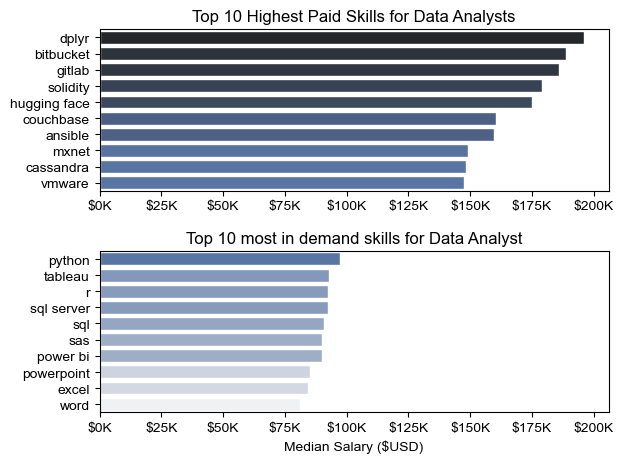

In [13]:
fig, ax = plt.subplots(2 , 1)

sns.set_theme(style="ticks")
#df_DA_US_TOP_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False) # or ax[0].invert_yaxis() ro reverse
sns.barplot(data=df_DA_US_TOP_pay, x='median', y=df_DA_US_TOP_pay.index, ax=ax[0], hue='median', palette='dark:b_r', legend=False)
# df_DA_US_TOP_Skills_Count[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
sns.barplot(data=df_DA_US_TOP_Skills_Count, x='median', y=df_DA_US_TOP_Skills_Count.index, ax=ax[1], hue='median', palette='light:b', legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts') 
ax[0].set_ylabel('') 
ax[0].set_xlabel('')
ax[1].set_title('Top 10 most in demand skills for Data Analyst') 
ax[1].set_ylabel('') 
ax[1].set_xlabel('Median Salary ($USD)')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'${int(x/1000)}K'))
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'${int(x/1000)}K'))
ax[1].set_xlim(ax[0].get_xlim()) #matches axes
fig.tight_layout() 

(20000.0, 250000.0)

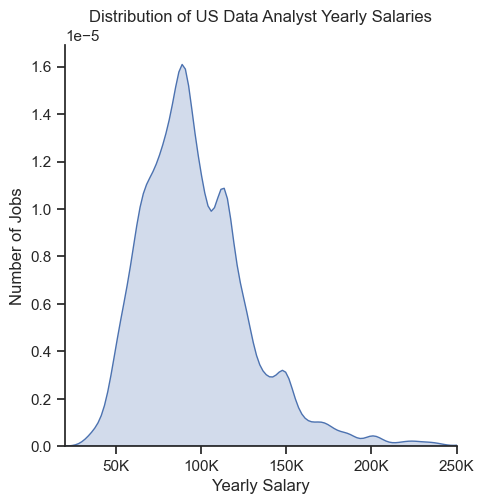

In [18]:
sns.displot(df_DA_US['salary_year_avg'], kind='kde', fill=True)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, position: f'{int(x/1000)}K'))
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.xlim(20000,250000)